In [1]:
#this script is to use tranied model and some data points to
#visualize the last "fully-connected layer" of GCN.

import torch
from GCN_regression import *
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd

import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier




In [8]:
#here we load the data and trained GCN model.

if __name__ == "__main__":
    torch.manual_seed = 1

    batch_size = 16
    max_epochs = 500
    #DATA_PATH = "./NLLZ_7_PROD_1_frames/"
    device = torch.device('cpu')

    dataset_size = len(My_dataset())
    perm = torch.randperm(dataset_size).numpy()
    partition = {}
    partition["train"] = perm[:int(dataset_size*8/10)]
    partition["validation"] = perm[int(dataset_size*8/10):int(dataset_size*9/10)]
    partition["test"] = perm[int(dataset_size*9/10):]

    #train_sampler = SubsetRandomSampler(partition["train"])
    #validation_sampler = SubsetRandomSampler(partition["validation"])
    #test_sampler = SubsetRandomSampler(partition["test"])
    #stopped using sampler, because they don't shuffle each epoch.



    train_loader = DataLoader(torch.utils.data.Subset(My_dataset(), partition["train"]), 
                              batch_size=batch_size, 
                              #sampler=train_sampler,
                              shuffle=True, 
                              num_workers=8)

    validation_loader = DataLoader(torch.utils.data.Subset(My_dataset(), partition["validation"]), 
                              batch_size=batch_size, 
                              #sampler=validation_sampler,
                              shuffle=True, 
                              num_workers=8)

    test_loader = DataLoader(torch.utils.data.Subset(My_dataset(), partition["test"]), 
                              batch_size=batch_size, 
                              #sampler=test_sampler,
                              shuffle=True, 
                              num_workers=8)


    #initialize GCN model here.
    model = GCN_regression_Net(n_features = 6, 
                               nhid1 = 32, 
                               nhid2 = 64, 
                               nhid3 = 128,  
                               batch_size = batch_size).to(device)
    
    model.load_state_dict(torch.load('./models/gcn_net_trained_11_16batched_MSELoss.pt.final', map_location=torch.device('cpu')))
    
    #specify optimizer and loss_func here.
    optimizer = torch.optim.Adam(model.parameters(), lr=1E-6, weight_decay=5e-4)
    loss_func = torch.nn.MSELoss()
    """"""
    
    
    #define a hook to strip embedding in each batch.
    def hook(module, input, output):
        batch_outputs.append(input)
        #print(batch_outputs)
    
    #going through the selected dataset, without the gradient.(no change on model)
    h = model.linear1.register_forward_hook(hook)
    batch_outputs = []
    total_outputs = []
    total_labels = []

    
    with torch.no_grad():
        for i, batch in enumerate(train_loader):
            batch_vec, X, edge_index, edge_weight, y = batch.batch, batch.X, batch.edge_index, batch.edge_attr, batch.y
            batch_vec, X, edge_index, edge_weight = batch_vec.to(device), Variable(torch.as_tensor(X, dtype=torch.float32)).to(device), edge_index.to(device), edge_weight.to(device)
        
            y = Variable(torch.as_tensor(y, dtype=torch.float32)).to(device)
            
            #optimizer.zero_grad()
            
            prediction_train = model(X, edge_index, edge_weight, batch_vec) #forward 
            loss = loss_func(prediction_train, y) / batch_size
        
            #loss.backward() # backward
            #optimizer.step() # optimizer step
            #optimizer.zero_grad()
            if i == 0:
                print(batch_outputs[0][0].detach().numpy().shape)
                total_outputs = batch_outputs[0][0].detach().numpy()
                total_labels = y.detach().numpy()
                print(total_labels.shape)
                #print(max(batch_outputs[0][0].detach().numpy()))
            else:
                total_outputs = np.concatenate((total_outputs, batch_outputs[0][0].detach().numpy()))
                print(total_outputs.shape)
                total_labels =  np.concatenate((total_labels, y.detach().numpy()))
                print(total_labels.shape)
                #print(max(batch_outputs[0][0].detach().numpy()))
            #total_outputs.append(batch_outputs[0][0].detach().numpy()) #record the embedding for this batch.
            
    h.remove()
    

(16, 128)
(16,)
(32, 128)
(32,)
(48, 128)
(48,)
(64, 128)
(64,)
(80, 128)
(80,)
(96, 128)
(96,)
(112, 128)
(112,)
(128, 128)
(128,)
(144, 128)
(144,)
(160, 128)
(160,)
(176, 128)
(176,)
(192, 128)
(192,)
(208, 128)
(208,)
(224, 128)
(224,)
(240, 128)
(240,)
(256, 128)
(256,)
(272, 128)
(272,)
(288, 128)
(288,)
(304, 128)
(304,)
(320, 128)
(320,)
(336, 128)
(336,)
(352, 128)
(352,)
(368, 128)
(368,)
(384, 128)
(384,)
(400, 128)
(400,)
(416, 128)
(416,)
(432, 128)
(432,)
(448, 128)
(448,)
(464, 128)
(464,)
(480, 128)
(480,)
(496, 128)
(496,)
(512, 128)
(512,)
(528, 128)
(528,)
(544, 128)
(544,)
(560, 128)
(560,)
(576, 128)
(576,)
(592, 128)
(592,)
(608, 128)
(608,)
(624, 128)
(624,)
(640, 128)
(640,)
(656, 128)
(656,)
(672, 128)
(672,)
(688, 128)
(688,)
(704, 128)
(704,)
(720, 128)
(720,)
(736, 128)
(736,)
(752, 128)
(752,)
(768, 128)
(768,)
(784, 128)
(784,)
(800, 128)
(800,)


In [12]:
for element in total_outputs:
    print(element)
    #print(type(element))
    #print(element.shape)

[2.8008185e+02 3.7611240e+01 9.6547714e+01 2.0100116e+02 0.0000000e+00
 0.0000000e+00 1.4922998e+02 1.2419176e+00 0.0000000e+00 7.4618446e+01
 0.0000000e+00 1.4384978e+02 0.0000000e+00 2.0478702e+02 0.0000000e+00
 2.3858232e+00 1.9248550e+02 3.1676331e+02 0.0000000e+00 2.2537744e+02
 0.0000000e+00 1.6735599e+02 0.0000000e+00 1.3772760e-02 7.5181717e+01
 1.8656494e+02 1.3181628e+02 0.0000000e+00 7.3923416e+01 6.7762665e+01
 8.9649605e+01 2.5327026e+02 3.0758738e+01 7.8809769e+01 0.0000000e+00
 3.4121674e+01 1.7700589e+02 0.0000000e+00 0.0000000e+00 3.3249373e+00
 3.0785616e+01 5.3072517e+01 4.4115864e+01 0.0000000e+00 1.9227666e+02
 0.0000000e+00 0.0000000e+00 5.6230301e+01 0.0000000e+00 4.4922018e-03
 0.0000000e+00 0.0000000e+00 2.3552101e+02 0.0000000e+00 1.4245094e+01
 4.7117867e+01 5.2708725e+01 6.3490349e+01 6.2111488e+01 5.8219790e+00
 0.0000000e+00 1.0049993e+02 8.3290390e+01 0.0000000e+00 3.6448570e+01
 0.0000000e+00 9.2872391e+01 3.6535698e+01 0.0000000e+00 7.3317291e+01
 9.681

[3.3822467e+02 4.7662460e+01 9.3839615e+01 1.8422226e+02 0.0000000e+00
 0.0000000e+00 1.3803252e+02 9.1004238e-02 0.0000000e+00 6.8391205e+01
 0.0000000e+00 1.4811113e+02 0.0000000e+00 2.0216074e+02 0.0000000e+00
 6.6482134e+00 1.8108224e+02 3.0558575e+02 0.0000000e+00 2.0928615e+02
 0.0000000e+00 1.5697430e+02 0.0000000e+00 1.2146793e-01 8.9091522e+01
 2.0938504e+02 1.3357047e+02 0.0000000e+00 7.5605011e+01 7.1421295e+01
 8.3315468e+01 2.2206781e+02 5.0209930e+01 7.0492508e+01 0.0000000e+00
 4.4817551e+01 1.7032028e+02 0.0000000e+00 0.0000000e+00 8.3447342e+00
 2.5078594e+01 4.9850952e+01 5.3123508e+01 2.8893026e-04 2.0571988e+02
 0.0000000e+00 0.0000000e+00 5.4232201e+01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.2606161e+02 0.0000000e+00 2.6531116e+01
 5.5585773e+01 5.1364922e+01 7.0531487e+01 6.6925385e+01 7.8908944e+00
 0.0000000e+00 9.7066338e+01 6.7159668e+01 0.0000000e+00 3.6256691e+01
 0.0000000e+00 9.9748596e+01 3.9669746e+01 0.0000000e+00 8.2008438e+01
 7.852

 1.34422112e+01 1.65911972e+02 0.00000000e+00 0.00000000e+00]
[2.8314252e+02 3.4890495e+01 8.3845322e+01 1.9019000e+02 0.0000000e+00
 0.0000000e+00 1.3848865e+02 3.3295220e-03 0.0000000e+00 7.1635040e+01
 0.0000000e+00 1.3129611e+02 0.0000000e+00 2.0707803e+02 0.0000000e+00
 4.2173400e+00 2.0187769e+02 2.9473608e+02 0.0000000e+00 2.1665741e+02
 0.0000000e+00 1.4728485e+02 0.0000000e+00 1.0441393e-01 7.4484589e+01
 1.6414359e+02 1.1905094e+02 0.0000000e+00 7.5331146e+01 7.8530975e+01
 8.0611862e+01 2.4227295e+02 3.7357483e+01 7.2465004e+01 0.0000000e+00
 3.6840782e+01 1.7197154e+02 0.0000000e+00 0.0000000e+00 8.2651634e+00
 3.6135601e+01 4.8423664e+01 4.7173504e+01 0.0000000e+00 1.8864188e+02
 0.0000000e+00 0.0000000e+00 5.1180969e+01 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.1749159e+02 0.0000000e+00 2.0876804e+01
 4.8833836e+01 5.1661079e+01 6.2420761e+01 5.9783821e+01 4.3436084e+00
 0.0000000e+00 1.0913806e+02 8.0729340e+01 0.0000000e+00 3.8110531e+01
 0.0000000e+00 

[2.76057129e+02 4.11618309e+01 8.71542892e+01 1.84925339e+02
 0.00000000e+00 0.00000000e+00 1.40545792e+02 5.79677343e-01
 0.00000000e+00 7.48851624e+01 0.00000000e+00 1.28627197e+02
 0.00000000e+00 1.96708557e+02 0.00000000e+00 3.53134036e+00
 1.74440216e+02 3.03241516e+02 0.00000000e+00 2.24788300e+02
 0.00000000e+00 1.49737061e+02 0.00000000e+00 0.00000000e+00
 8.66375046e+01 1.68313370e+02 1.23575470e+02 0.00000000e+00
 8.01302567e+01 6.73186188e+01 8.65096436e+01 2.34536423e+02
 4.00383453e+01 7.38665771e+01 1.89684510e-01 3.21935196e+01
 1.75439362e+02 0.00000000e+00 0.00000000e+00 1.84838867e+00
 2.58927078e+01 4.68117485e+01 5.82370758e+01 1.19822726e-01
 1.89308640e+02 0.00000000e+00 0.00000000e+00 5.17451591e+01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.10176926e+02 0.00000000e+00 1.98354950e+01 6.20868225e+01
 5.27664795e+01 6.58483353e+01 6.16111908e+01 6.43327808e+00
 0.00000000e+00 9.68329086e+01 7.14134521e+01 0.00000000e+00
 3.47286720e+01 0.000000

In [13]:
print(total_outputs.shape)
#outputs = []
#print(total_outputs)
print(len(total_outputs))
print(len(total_outputs[0]))

(800, 128)
800
128


In [14]:
print(total_labels)
print(total_labels.shape)

[292. 651. 518. 230. 335. 248. 241. 373. 270. 509. 314. 274. 245. 594.
 393. 310. 340. 365. 137. 425. 303. 470. 211. 545. 220. 332. 419. 283.
 445. 431. 333. 315. 309. 234. 445. 263. 466. 503. 313. 429. 267. 341.
 237. 352. 204. 423. 298. 334. 377. 587. 368. 290. 250. 200. 317. 418.
 330. 298. 594. 192. 354. 282. 170. 514. 351. 312. 430. 167. 358. 389.
 221. 176. 513. 197. 554. 592. 289. 150. 392. 225. 274. 449. 250. 295.
 384. 424. 225. 190. 510. 169. 263. 527. 188. 241. 254. 437. 352. 372.
 352. 235. 348. 616. 422. 321. 116. 332. 301. 249. 258. 431. 491. 464.
 238. 337. 164. 303. 339. 281. 187. 318. 488. 240. 111. 299. 163. 403.
 607. 264. 423. 416. 413. 305. 269. 291. 253. 294. 286. 302. 401. 254.
 350. 470. 321. 200. 190. 271. 328. 426. 145. 245. 365. 295. 393. 415.
 290. 285. 421. 362. 193. 212. 207. 186. 235. 298. 278. 461. 338. 305.
 141. 311. 162. 377. 405. 147. 262. 488. 402. 349. 251. 250. 355. 139.
 237. 276. 240. 187. 185. 179. 141. 263. 546. 346. 511. 451. 180. 321.
 506. 

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
print(total_outputs.shape)
pca_result = pca.fit_transform(total_outputs)

(800, 128)


In [16]:
pca_result.shape

(800, 10)

In [17]:
pca.explained_variance_ratio_

array([0.23926342, 0.1369926 , 0.12260418, 0.10288819, 0.08382399,
       0.06081117, 0.05000151, 0.04673177, 0.03641545, 0.03124588],
      dtype=float32)

In [18]:
print(pca_result)

[[ 28.658115   15.707532  -40.568077  ... -14.392845    5.3997846
  -18.273102 ]
 [-14.2516775  62.771336   28.657223  ...   6.391467  -15.3573
   13.7501   ]
 [-39.362297  -15.816399  -18.391973  ...  12.204204   -9.518348
   -9.074091 ]
 ...
 [ -5.2013025  10.183907  -26.97614   ...  34.970043    6.4741197
   13.349103 ]
 [ -7.4686675 -41.85232    28.727577  ... -22.949465    8.593529
   23.231646 ]
 [  0.2858717  18.319883    2.4077382 ...   3.4502466  38.736397
   -8.733428 ]]


In [19]:
print(pca_result[:,0])
print(pca_result[:,1])

[ 28.658115   -14.2516775  -39.362297   -43.211655   -62.688305
 -35.98801     36.113346    74.15456     28.283092    51.134773
  33.92971    -24.43054    -19.947304    -5.2012305   -7.4687905
   0.28591698  28.657936   -14.25177    -39.36211    -43.211823
 -62.68838    -35.98801     36.113194    74.1545      28.283106
  51.1347      33.92973    -24.430456   -19.947247    -5.2013025
  -7.468667     0.28587034  28.657936   -14.25177    -39.36211
 -43.211823   -62.68838    -35.98801     36.113194    74.1545
  28.283106    51.1347      33.92973    -24.430456   -19.947247
  -5.2013025   -7.468667     0.28587034  28.657936   -14.25177
 -39.36211    -43.211823   -62.68838    -35.98801     36.113194
  74.1545      28.283106    51.1347      33.92973    -24.430456
 -19.947247    -5.2013025   -7.468667     0.28587034  28.657936
 -14.25177    -39.36211    -43.211823   -62.68838    -35.98801
  36.113194    74.1545      28.283106    51.1347      33.92973
 -24.430456   -19.947247    -5.2013025   -7.

In [30]:
def lifetime_mapping(labels):
    #take in labels, numbers, output the index
    output = []
    for element in labels:
        if element < 300:
            output.append(int(0))
        elif element >=300 and element <600:
            output.append(int(1))
        elif element >=600:
            output.append(int(2))
    return output

In [31]:
diction={'x(PC 1)': pca_result[:,0],'y(PC 2)': pca_result[:,1], 'z(PC 3)': pca_result[:,2], 'lifetime': lifetime_mapping(total_labels)}
df = pd.DataFrame(data=diction)



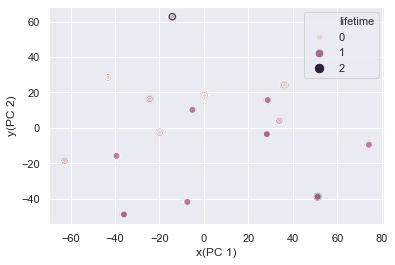

In [33]:
sns.set()
sns.scatterplot(x="x(PC 1)", y="y(PC 2)", hue = 'lifetime', size = 'lifetime', data=df, alpha= 0.8)
#plt.scatter(x=pca_result[:,0], y=pca_result[:,1],alpha= 0.8)
plt.show()

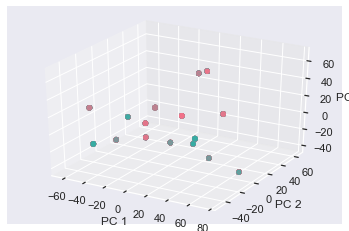

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['x(PC 1)']
y = df['y(PC 2)']
z = df['z(PC 3)']

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(x, y, z, c=df['lifetime'], cmap=cmap)

plt.show()

In [35]:
"""
for name, param in model.named_parameters():
    #if name == 'linear1.weight':
    if name == 'conv3.weight':
        #print(param.detach().numpy())
        weights = param.detach().numpy()
"""

"\nfor name, param in model.named_parameters():\n    #if name == 'linear1.weight':\n    if name == 'conv3.weight':\n        #print(param.detach().numpy())\n        weights = param.detach().numpy()\n"

In [36]:
#T-SNE visualization.
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)


In [37]:
total_outputs.shape[1]

128

In [38]:
tsne_results = tsne.fit_transform(total_outputs)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 800 samples in 0.014s...
[t-SNE] Computed neighbors for 800 samples in 0.086s...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 34.080898
[t-SNE] KL divergence after 300 iterations: 0.073180
t-SNE done! Time elapsed: 1.4161508083343506 seconds


In [39]:
diction={'x': tsne_results[:,0],'y': tsne_results[:,1], 'lifetime': lifetime_mapping(total_labels)}
df2 = pd.DataFrame(data=diction)

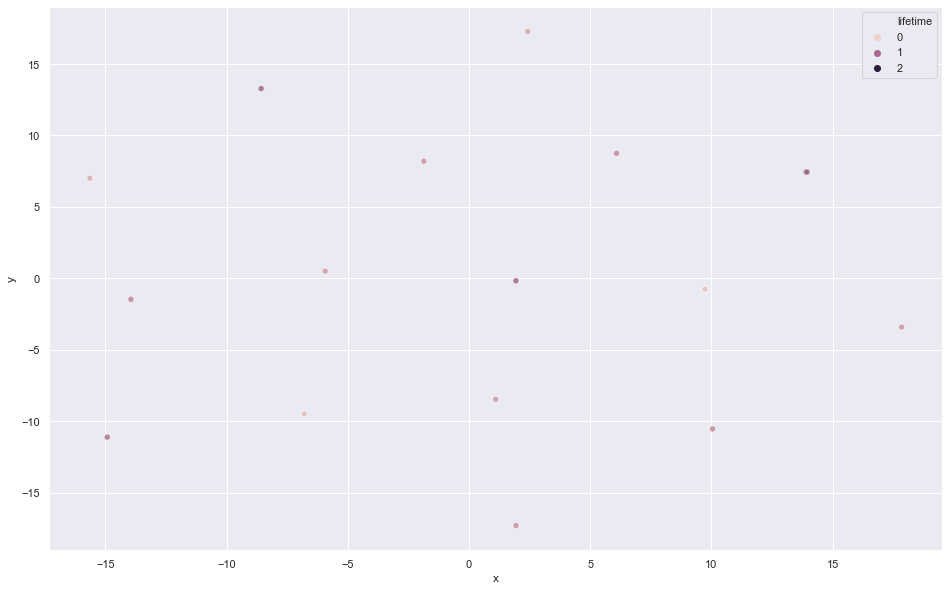

In [40]:

plt.figure(figsize=(16,10))
sns.scatterplot(
    x='x', y='y',
    hue="lifetime",
    #palette=sns.color_palette("hls", 10),
    data=df2,
    legend="full",
    alpha=0.3
)